# Cataract Forecasting

## Import Libraries

In [1]:
!pip install pandas statsmodels matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Read Cataract Data

In [3]:
def create_df():
  # Load the dataset from the CSV file
  data = pd.read_csv('Dataset.csv')

  # Convert 'Year' column to datetime format
  data['Year'] = pd.to_datetime(data['Year'], format='%Y')

  # Set 'Year' as the index
  data.set_index('Year', inplace=True)

  return data


## Generate Forecast

In [15]:
def create_forecast_data(data, race):

  # Split the data into training and testing sets
  train_data = data.iloc[:-1]
  test_data = data.iloc[-1:]

  # Fit a linear regression model
  X_train = train_data.index.year.values.reshape(-1, 1)
  y_train = train_data[race]
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Additional years for forecasting
  additional_years = [2030, 2040, 2050]
  X_additional = pd.DataFrame(additional_years, columns=['Year'])
  X_additional['Year'] = pd.to_datetime(X_additional['Year'], format='%Y').dt.year  # Extract the year component
  forecast_additional = model.predict(X_additional.values.reshape(-1, 1))

  # Forecast using the linear regression model
  X_test = test_data.index.year.values.reshape(-1, 1)
  forecast_values = model.predict(X_test)

  # Create a DataFrame to hold all the forecasted values, including the additional years
  forecast_data = pd.DataFrame({
      'Year': list(test_data.index.year) + additional_years,
       race : list(forecast_values) + list(forecast_additional)
  })

  return forecast_data, forecast_additional

## Plot Forecast

In [19]:
def create_plot(data, forecast_data, forecast_additional, race):
    test_data = data.iloc[-1:]
    additional_years = [2030, 2040, 2050]

    # Plot the actual and forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(data.index.year, data[race], label='Actual Data')
    plt.plot(test_data.index.year, test_data[race], 'bo', label='Test Data')
    plt.plot(forecast_data['Year'], forecast_data[race], 'r--', label='Forecast')
    plt.scatter(additional_years, forecast_additional, color='g', marker='o', label='Additional Forecasts')

    # Add labels to the points
    for year, forecast_value in zip(additional_years, forecast_additional):
        plt.text(year, forecast_value, f'{forecast_value:.2f}', ha='right', va='bottom')

    plt.xlabel('Year')
    plt.ylabel(race)
    plt.title(f'Time Series Forecast: {race}')
    plt.legend()
    plt.show()


In [20]:
def cataract_prevalance_forecast(region):
  # Create a dataframe
  data = create_df()
  # Get forecast information
  forecast_data, forecast_additional = create_forecast_data(data, region)
  # Plot forecast
  create_plot(data, forecast_data, forecast_additional, region)

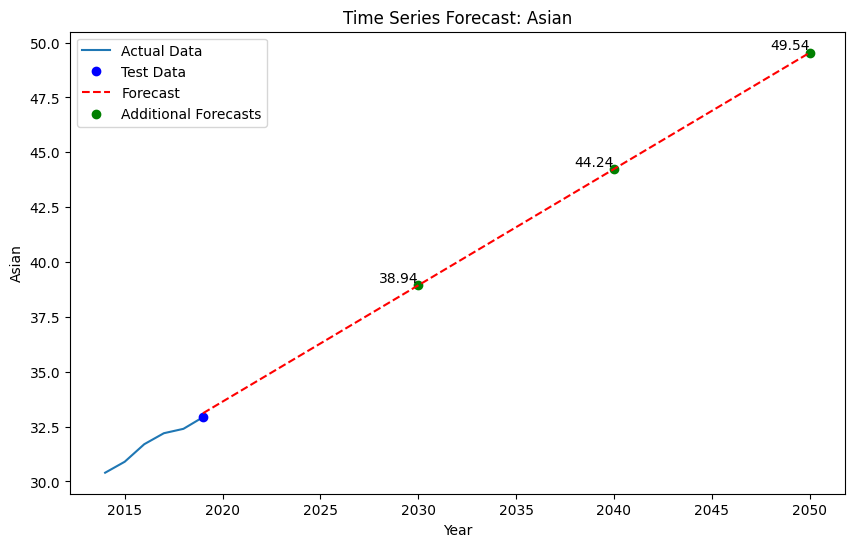

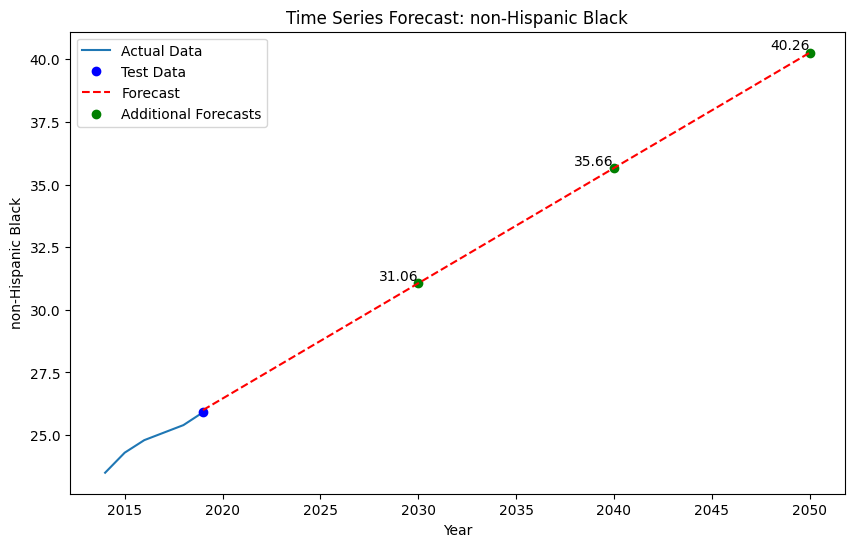

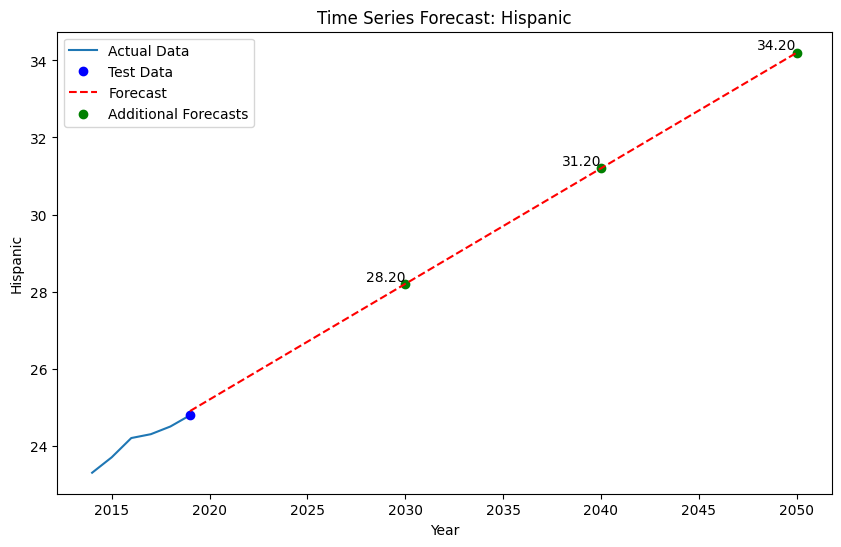

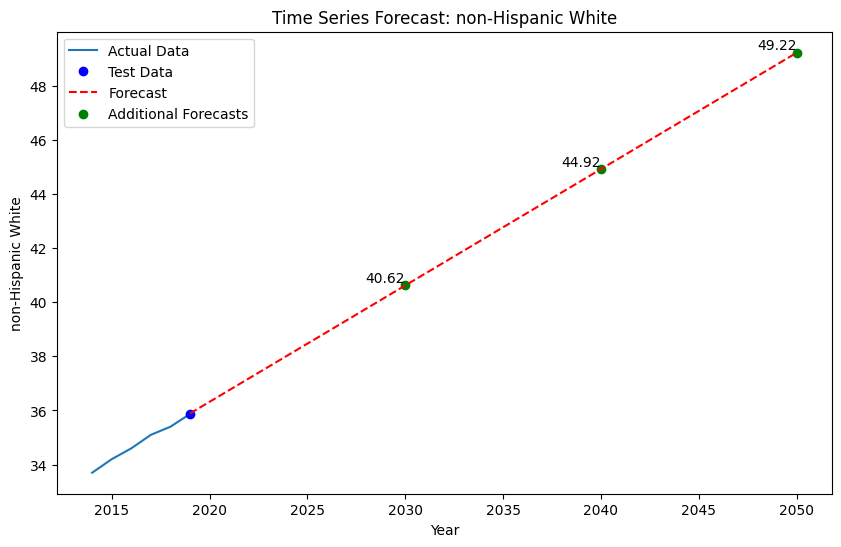

In [21]:
races = ['Asian', 'non-Hispanic Black', 'Hispanic', 'non-Hispanic White']

for region in races:
  cataract_prevalance_forecast(region)

   Year     CA
0  2018  30.80
1  2019  30.98
2  2030  32.96
3  2040  34.76
4  2050  36.56


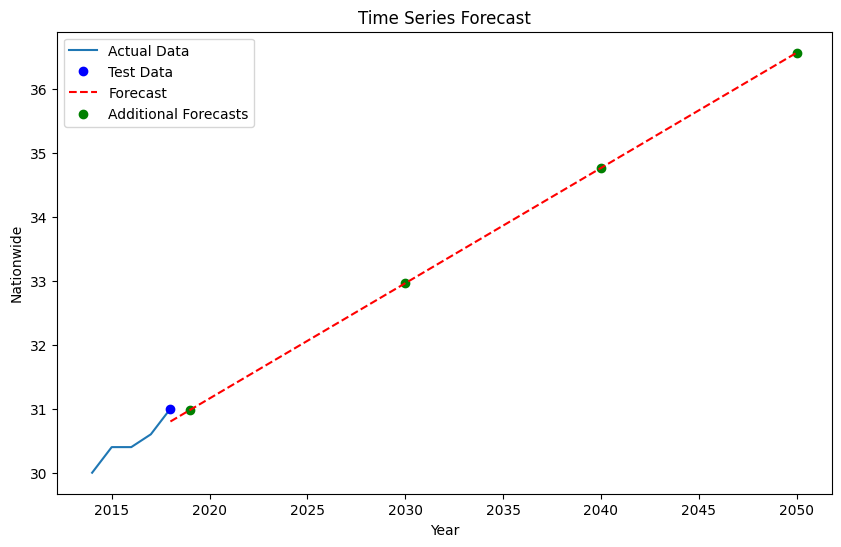

In [ ]:
# Load the dataset from the CSV file
data = pd.read_csv('dataset.csv')

# Convert 'Year' column to datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')

# Set 'Year' as the index
data.set_index('Year', inplace=True)

# Split the data into training and testing sets
train_data = data.iloc[:-1]
test_data = data.iloc[-1:]

# Fit a linear regression model
X_train = train_data.index.year.values.reshape(-1, 1)
y_train = train_data['CA']
model = LinearRegression()
model.fit(X_train, y_train)

# Additional years for forecasting
additional_years = [2019, 2030, 2040, 2050]
X_additional = pd.DataFrame(additional_years, columns=['Year'])
X_additional['Year'] = pd.to_datetime(X_additional['Year'], format='%Y').dt.year  # Extract the year component
forecast_additional = model.predict(X_additional.values.reshape(-1, 1))

# Forecast using the linear regression model
X_test = test_data.index.year.values.reshape(-1, 1)
forecast_values = model.predict(X_test)

# Create a DataFrame to hold all the forecasted values, including the additional years
forecast_data = pd.DataFrame({
    'Year': list(test_data.index.year) + additional_years,
    'CA': list(forecast_values) + list(forecast_additional)
})

# Display the forecasted values table
print(forecast_data)

# Plot the actual and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index.year, data['CA'], label='Actual Data')
plt.plot(test_data.index.year, test_data['CA'], 'bo', label='Test Data')
plt.plot(forecast_data['Year'], forecast_data['CA'], 'r--', label='Forecast')
plt.scatter(additional_years, forecast_additional, color='g', marker='o', label='Additional Forecasts')
plt.xlabel('Year')
plt.ylabel('Nationwide')
plt.title('Time Series Forecast')
plt.legend()
plt.show()